In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_data=pd.read_excel(r'flight_train.xlsx')

In [3]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
pd.set_option('display.max_columns',None) # to set max columns

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [7]:
train_data['Duration'].value_counts() # gives unique records of each

# the model will not be able to read the duration as it is in string so we need to preprocess it

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
41h 20m      1
31h 50m      1
27h 30m      1
31h 30m      1
19h 50m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.dropna(inplace=True)

# dropping NaN values

In [9]:
train_data.isnull().sum()     # summing all nulls

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

from description we can see the date_of_journey is a object dta type

therefore,we have to convert this datatype into timestamp so as to use this column properly for prediction

for this we require pandas to_datetime to convert object data type to datetime dtype

.dt.day method will extract only day of that date

.dt.month will extract only month of that date

In [10]:
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [11]:
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [14]:
# Departure time is when a plane leaves the gate
# similar to date_of_journey we can convert values from Dep_time

# extracting hours
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour

#extracting minutes
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

# drop Dep_time as it is of no use
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
# axis=1 checks the columns name , which ever name matches it drops that column


In [17]:
# arrival time is when the plane pulls up to the gate
# similar to date_od_journey we can extract values from Arrival_Time

train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour

train_data["Arrival_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
"2h 50m".split()

['2h', '50m']

In [20]:
len("2h 50m".split())

2

In [21]:
# time taken by plane to reach destination is called Duration
# it is the difference between departure time and arrival time

# here we have to split hours and minutes like arrival time

# assigning and converting duration column into list
duration=list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:            # check if duration contains only hour or min
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"    # adds 0 minute
        else:
            duration[i]="0h "+ duration[i]           # adds 0 hour
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))     # extract hours frpm duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))     # extract mins frpm duration

In [22]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [24]:
train_data.drop(["Duration"],axis=1,inplace=True)

# handling categorical data

one can find many ways to handle categorical data. some of them are:

1.Nominal data--> data are not in any order-->OneHotEncoder is used in this case

2.Ordinal data-->data are in order-->LabelEncoder is used in this case

In [25]:
train_data["Airline"].value_counts()    

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

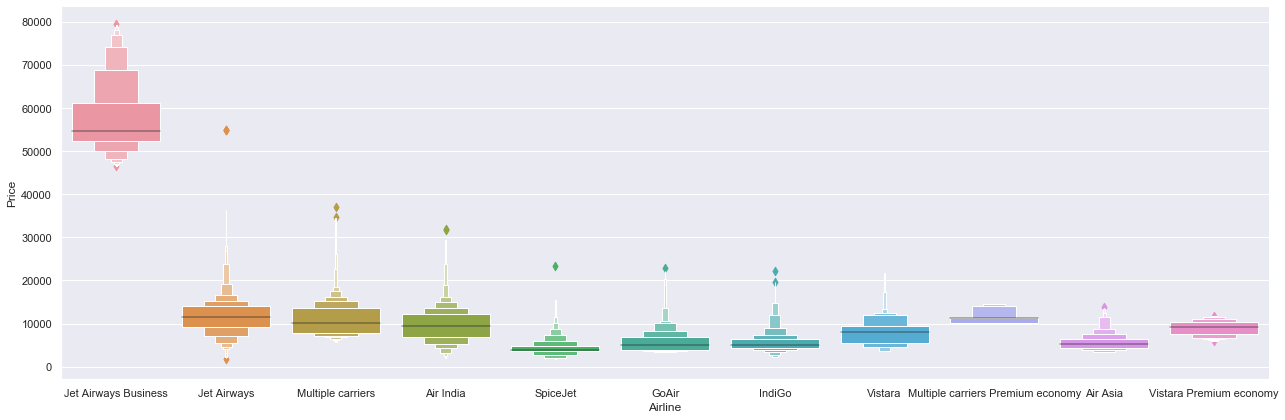

In [26]:
# from graph we can see that Jet Airways Business have the highest price
# apart from first airline almost all are having similar median

#Airline vs price
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [27]:
# as airline is nominal categorical data we will perform OneHotEncoding

Airline=train_data[["Airline"]]

Airline=pd.get_dummies(Airline,drop_first=True)   # onehot encoding technique, drop_first droppng one of the feature that is 
                                                # not required
# if we have 5 features and we are doinf OHE then it will create 5 features from that one feature can be removed and then
# remaining 4 features will actually repesent the 5 features

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [28]:
# where ever a particular record(airline) is present there it prints 1

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [30]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

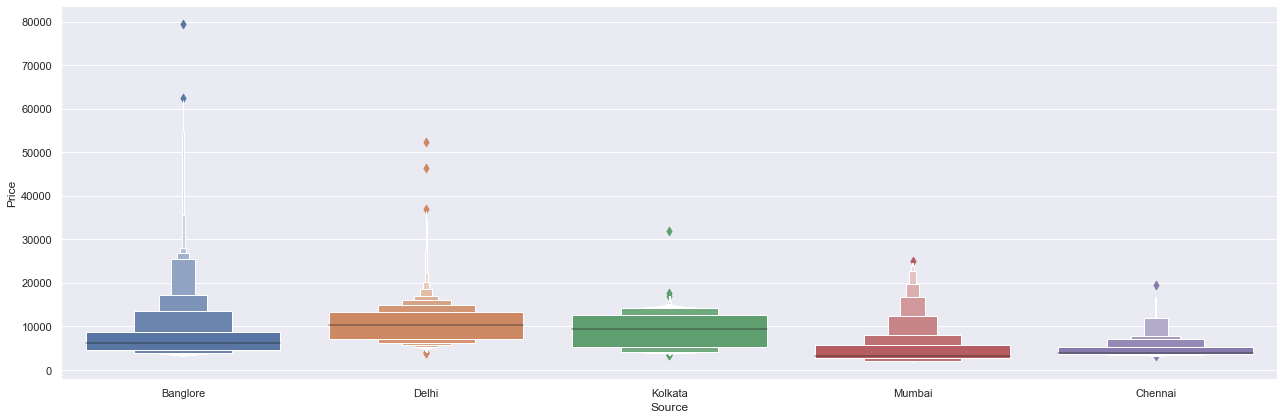

In [31]:
# source vs price
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

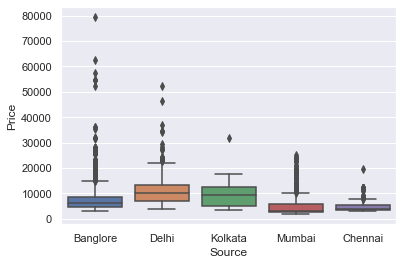

In [32]:
sns.boxplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False))
plt.show()

In [33]:
# as source is nominal categorical data we will perform OneHotEncoding

Source=train_data[["Source"]]

Source=pd.get_dummies(Source,drop_first=True)   # onehot encoding technique, drop_first droppng one of the feature that is 
                                                # not required
# if we have 5 features and we are doinf OHE then it will create 5 features from that one feature can be removed and then
# remaining 4 features will actually repesent the 5 features

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [35]:
Destination=train_data[["Destination"]]

Destination=pd.get_dummies(Destination,drop_first=True)   # onehot encoding technique, drop_first droppng one of the feature that is 
                                                # not required
# if we have 5 features and we are doinf OHE then it will create 5 features from that one feature can be removed and then
# remaining 4 features will actually repesent the 5 features

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10677                CCU → BLR
10678                CCU → BLR
10679                BLR → DEL
10680                BLR → DEL
10681    DEL → GOI → BOM → COK
Name: Route, Length: 10681, dtype: object

In [37]:
# additional info contains almost 80% no_info
#route and total_stops are related to each other

train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [38]:
train_data["Total_Stops"].value_counts()

1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
# As this is case of ordinal categorical type we perform LabelEncoder
# when stops increases then price increases
# here values are assigned with corresponding keya

train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [40]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [41]:
# concatenate dataframe------> train_data+airline+source+destination
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [42]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [44]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
data_train.shape

(10681, 29)

In [46]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

# test data

In [119]:
test_data=pd.read_excel(r"flight_test.xlsx")

In [120]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [121]:
# all same process like train dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [122]:
test_data.dropna(inplace=True)


In [123]:
test_data.isnull().sum()     # summing all nulls

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [124]:
test_data["Journey_day"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

test_data.drop(["Date_of_Journey"],axis=1,inplace=True)



In [125]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [126]:
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour

#extracting minutes
test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute

# drop Dep_time as it is of no use
test_data.drop(["Dep_Time"],axis=1,inplace=True)



In [127]:
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour

test_data["Arrival_min"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute

test_data.drop(["Arrival_Time"],axis=1,inplace=True)



In [128]:
duration=list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:            # check if duration contains only hour or min
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"    # adds 0 minute
        else:
            duration[i]="0h "+ duration[i]           # adds 0 hour
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))     # extract hours frpm duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))     # extract mins frpm duration
    
    
test_data["Duration_hours"]=duration_hours
test_data["Duration_mins"]=duration_mins

test_data.drop(["Duration"],axis=1,inplace=True)



In [129]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [130]:
Airline=test_data[["Airline"]]

Airline=pd.get_dummies(Airline,drop_first=True)   # onehot encoding technique, drop_first droppng one of the feature that is 
                                                # not required
# if we have 5 features and we are doinf OHE then it will create 5 features from that one feature can be removed and then
# remaining 4 features will actually repesent the 5 features

Airline.head()



,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [131]:
Source=test_data[["Source"]]

Source=pd.get_dummies(Source,drop_first=True)   # onehot encoding technique, drop_first droppng one of the feature that is 
                                                # not required
# if we have 5 features and we are doinf OHE then it will create 5 features from that one feature can be removed and then
# remaining 4 features will actually repesent the 5 features

Source.head()



,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [132]:
Destination=test_data[["Destination"]]

Destination=pd.get_dummies(Destination,drop_first=True)   # onehot encoding technique, drop_first droppng one of the feature that is 
                                                # not required
# if we have 5 features and we are doinf OHE then it will create 5 features from that one feature can be removed and then
# remaining 4 features will actually repesent the 5 features

Destination.head()



,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [133]:
test_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)



In [134]:
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)

data_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [135]:
data_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [136]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [137]:
data_test.columns


Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [138]:
data_test.shape

(2671, 28)

# feature scaling

In [48]:
data_train.shape

(10681, 29)

In [154]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [49]:
X=data_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

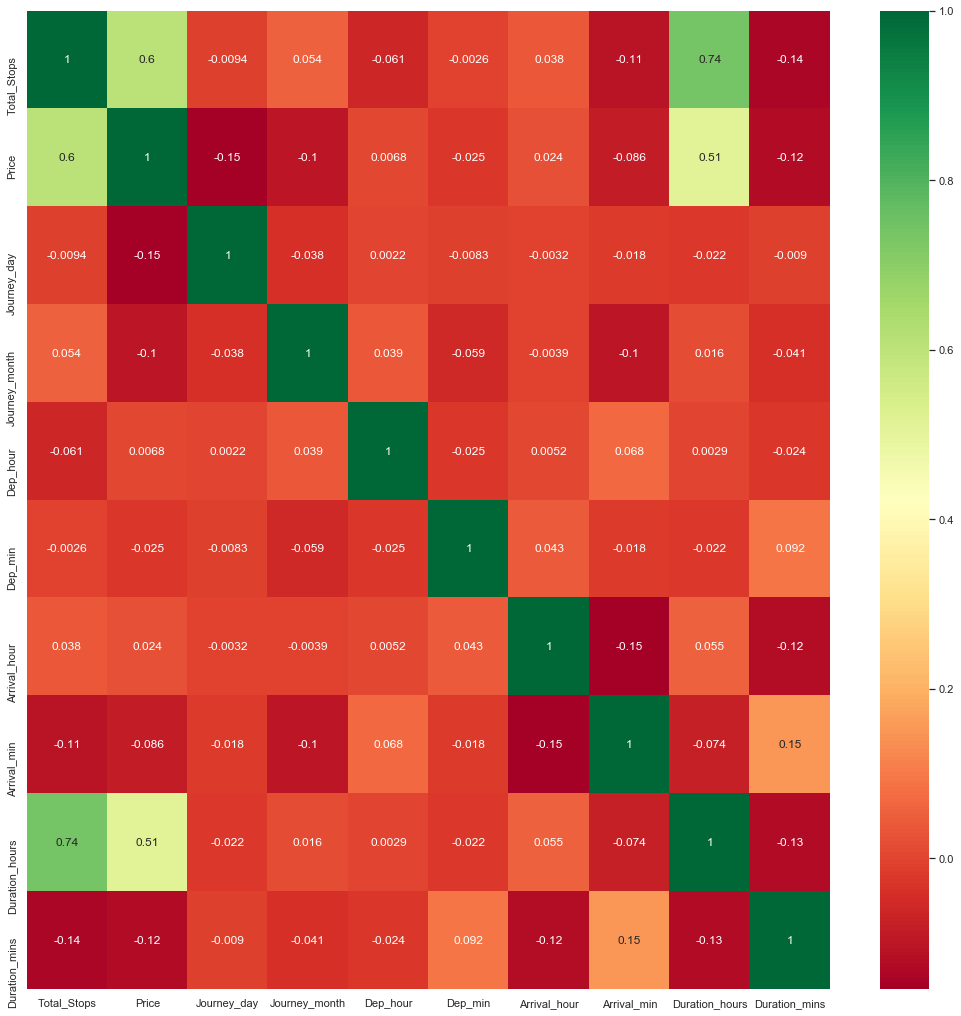

In [51]:
# finds correlation between independent and dependent attributes

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

plt.show()

In [52]:
# important feature using extraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [53]:
print(selection.feature_importances_)

[2.33990497e-01 1.43918946e-01 5.30068834e-02 2.56631394e-02
 2.12420221e-02 2.79118767e-02 1.88720093e-02 1.14920452e-01
 1.76576618e-02 1.02106823e-02 1.89681281e-03 1.79318474e-02
 1.41031341e-01 6.75601494e-02 1.93534715e-02 8.62818243e-04
 2.96917902e-03 4.90370613e-03 8.63224164e-05 5.47078277e-04
 1.08783081e-02 2.99708651e-03 5.54541280e-03 1.04260891e-02
 1.31931317e-02 6.94411420e-03 4.30969999e-04 2.50479914e-02]


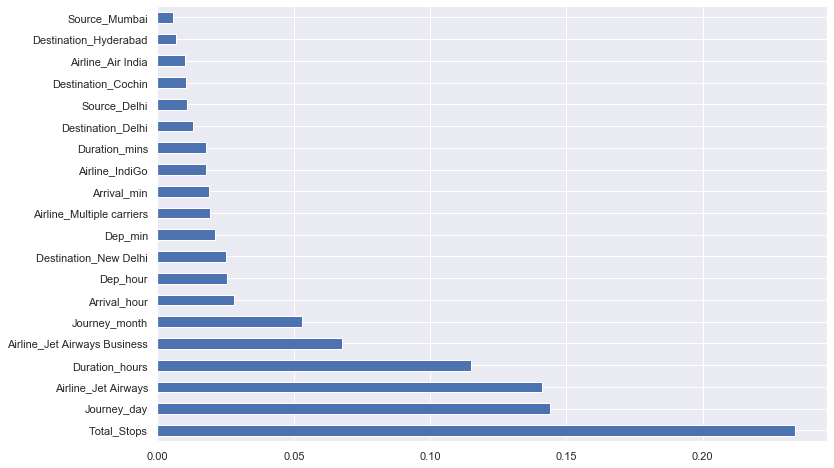

In [54]:
# features important for better visualization

plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
y_pred=reg_rf.predict(X_test)

In [58]:
reg_rf.score(X_train,y_train)

0.9536475311302927

In [59]:
reg_rf.score(X_test,y_test)

0.7939532757951089

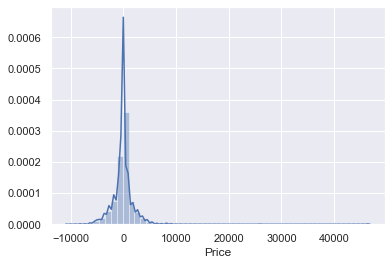

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

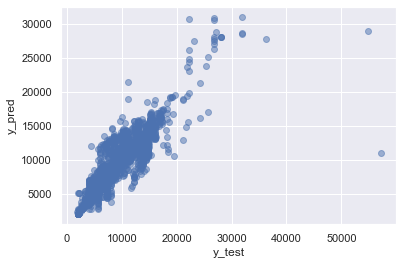

In [61]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [62]:
from sklearn import metrics


In [63]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



MAE: 1179.952623066711
MSE: 4560012.072356437
RMSE: 2135.4184771038294


In [64]:
metrics.r2_score(y_test,y_pred)

0.7939532757951089

# hyperparameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# no. of features to be considered at every split
max_features=["auto","sqrt"]

# max no, of levels in trees
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

#minimum no. of samples required to split a node
min_samples_split=[2,5,10,15,100]

#min no. of samples requires at each leaf node
min_samples_leaf=[1,2,5,10]

In [67]:
# create randon grid

random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
              'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}


In [68]:
# random search of parameters using fold cross validation,
# search across 100 different combinations

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [69]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   7.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   7.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   7.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   7.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   6.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=sqrt 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, total=   5.3s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=sqrt 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, tot

[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, total=  10.1s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, total=  10.1s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, total=  10.2s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, total=  10.9s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [70]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

In [71]:
prediction=rf_random.predict(X_test)

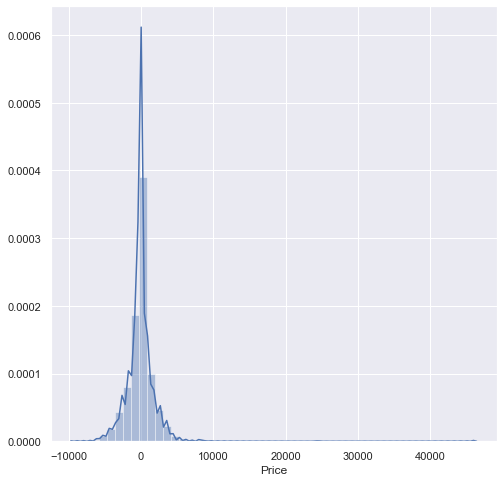

In [72]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

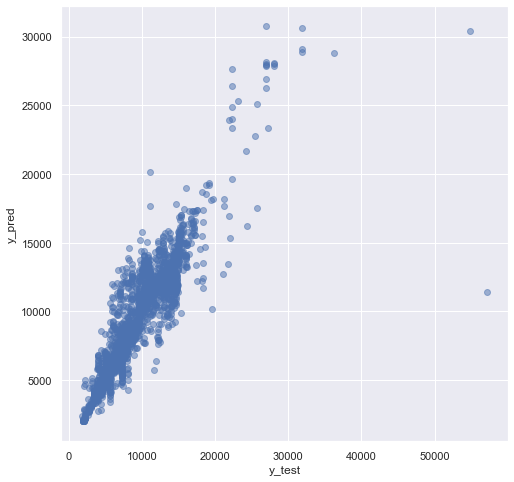

In [73]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1135.0770149701636
MSE: 4105986.361884145
RMSE: 2026.323360642162


# Save the model to reuse it again

In [79]:
import pickle
# open a file,where you want to store the data

file=open("flight_rf.pkl","wb")

# dump information to that file
pickle.dump(rf_random,file)

In [80]:
model=open("flight_rf.pkl",'rb')
forest=pickle.load(model)

In [81]:
y_prediction=forest.predict(X_test)

In [82]:
metrics.r2_score(y_test,y_prediction)

0.8144686842771902